# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [163]:
# Initial imports
import os
from pathlib import Path
import pandas as pd
from newsapi import NewsApiClient
import nltk as nltk
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from dotenv import load_dotenv
load_dotenv()
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [164]:
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\marjo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [171]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
#api_key = os.getenv("api_key")
api_key = os.getenv("NEWS_API_KEY")
api_key

In [172]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='be8219d2a70142399fba9fd2dd3f0b83')

In [173]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_news = newsapi.get_everything(q = "bitcoin", language = "en")
print(f"Total Results: {btc_news['totalResults']}")

Total Results: 10085


In [176]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
btc_news['articles']

[{'source': {'id': 'engadget', 'name': 'Engadget'},
  'author': 'https://www.engadget.com/about/editors/saqib-shah',
  'title': 'El Salvador becomes the first country to approve Bitcoin as legal currency',
  'description': 'El Salvador has voted to adopt Bitcoin as legal tender..',
  'url': 'https://www.engadget.com/el-salvador-bitcoin-legal-tender-120440725.html',
  'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-06/84c12d30-c919-11eb-a6ff-cedcc0c31aae',
  'publishedAt': '2021-06-09T12:04:40Z',
  'content': "El Salvador's President Nayib Bukele has made good on his promise to adopt Bitcoin as legal tender. Officials in the Central American country's congress voted to accept the cryptocurrency by a majori… [+1414 chars]"},
 {'source': {'id': None, 'name': 'Gizmodo.com'},
  'author': 'Matt Novak',
  'title': 'El Salvador Becomes First Country to Recognize Bitcoin as Currency',
  'description': 'El Salvador has become the first country in the world to recognize the crypt

In [153]:
#Fetch the Ethereum news articles 
eth_news = newsapi.get_everything(q = "ethereum", language = "en")
# YOUR CODE HERE!
print(f"Total Results: {eth_news['totalResults']}")

Total Results: 2583


In [177]:
analyzer = SentimentIntensityAnalyzer()

In [178]:
#Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
text_sent = {
    'text_compound':[],
    'text_pos':[],
    'text_neu':[],
    'text_neg':[],
    'text_sent':[],
}

for index, row in btc_df.iterrows():
    try:         
        text_sentiment = analyzer.polarity_scores(row['content'])
        text_sent['text_compound'].append(text_sentiment['compound'])
        text_sent['text_pos'].append(text_sentiment['pos'])
        text_sent['text_neu'].append(text_sentiment['neu'])
        text_sent['text_neg'].append(text_sentiment['neg'])
        text_sent['text_sent'].append(text_sentiment['compound'])
        
    except AttributeError:
        pass

In [179]:
#Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
text_sent = {
    'text_compound':[],
    'text_pos':[],
    'text_neu':[],
    'text_neg':[],
    'text_sent':[],
}

for index, row in btc_df.iterrows():
    try:         
        text_sentiment = analyzer.polarity_scores(row['content'])
        text_sent['text_compound'].append(text_sentiment['compound'])
        text_sent['text_pos'].append(text_sentiment['pos'])
        text_sent['text_neu'].append(text_sentiment['neu'])
        text_sent['text_neg'].append(text_sentiment['neg'])
        text_sent['text_sent'].append(text_sentiment['compound'])
        
    except AttributeError:
        pass

In [161]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,level_0,index,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.00000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,9.50000,9.50000,0.211855,0.077350,0.902200,0.020400,0.211855
std,5.91608,5.91608,0.329191,0.071029,0.072576,0.032425,0.329191
min,0.00000,0.00000,-0.381800,0.000000,0.718000,0.000000,-0.381800
25%,4.75000,4.75000,0.000000,0.032250,0.844750,0.000000,0.000000
50%,9.50000,9.50000,0.165150,0.065500,0.922000,0.000000,0.165150
75%,14.25000,14.25000,0.369700,0.107250,0.955500,0.057250,0.369700
max,19.00000,19.00000,0.840200,0.282000,1.000000,0.083000,0.840200


In [181]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df = pd.DataFrame.from_dict(eth_news['articles'])
eth_df = eth_df.drop(columns = ['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt'])
eth_df.head()

,content
0,TL;DR: The Cryptocurrency with Ethereum and So...
1,It wasn't long ago that your average person ha...
2,This article was translated from our Spanish e...
3,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...
4,This new mining feature is called 'Norton Cryp...


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score

Q: Which coin had the highest compound score?

A: Ethereum had the highest compund score

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [182]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marjo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [184]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
wnl = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append("_")
stop.append("\`")
stop.append("``")
stop.append("''''")
stop = set(stop)

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [185]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    words = word_tokenize(text)
   
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Lemmatize words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    return tokens

In [186]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

btc_df['tokens'] = btc_df['content'].apply(tokenizer)
btc_df.head()

,level_0,index,content,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,0,0,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.718,0.0,0.8402,"[El, Salvador, 's, President, Nayib, Bukele, h..."
1,1,1,El Salvador has become the first country in th...,0.1280,0.043,0.957,0.0,0.1280,"[El, Salvador, ha, become, the, first, country..."
2,2,2,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.831,0.0,0.6908,"[It, 's, all, about, clean, energy, ,, it, see..."
3,3,3,image captionThe move means bitcoin will be ac...,0.2732,0.060,0.940,0.0,0.2732,"[image, captionThe, move, mean, bitcoin, will,..."
4,4,4,"Several crypto fans that descended on Miami, F...",0.5574,0.107,0.893,0.0,0.5574,"[Several, crypto, fan, that, descended, on, Mi..."


In [187]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!

eth_df = eth_df.dropna()
eth_df['tokens'] = eth_df['content'].apply(tokenizer)
eth_df.head()

,content,tokens
0,TL;DR: The Cryptocurrency with Ethereum and So...,"[TL, ;, DR, :, The, Cryptocurrency, with, Ethe..."
1,It wasn't long ago that your average person ha...,"[It, wa, n't, long, ago, that, your, average, ..."
2,This article was translated from our Spanish e...,"[This, article, wa, translated, from, our, Spa..."
3,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,"[Bitcoin, and, Ethereum, Yuriko, Nakao, Ether,..."
4,This new mining feature is called 'Norton Cryp...,"[This, new, mining, feature, is, called, 'Nort..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [123]:
from collections import Counter
from nltk import ngrams

In [191]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
def bigram_counter(articles): 
    big_string = ' '.join(articles)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns = ['bigram', 'count'])

In [126]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
bigram_counter(btc_df['content'])

,bigram,count
0,"(char, ])",19
1,"(El, Salvador)",7
2,"(…, [)",7
3,"(in, the)",6
4,"((, Reuters)",6
5,"(Reuters, ))",6
6,"(), -)",6
7,"(,, a)",6
8,"(legal, tender)",5
9,"(,, the)",5


In [192]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [198]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
bigram_counter(btc_df['content'])

,bigram,count
0,"(char, ])",19
1,"(El, Salvador)",7
2,"(…, [)",7
3,"(in, the)",6
4,"((, Reuters)",6
5,"(Reuters, ))",6
6,"(), -)",6
7,"(,, a)",6
8,"(legal, tender)",5
9,"(,, the)",5


In [195]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
bigram_counter(eth_df['content'])

,bigram,count
0,"(char, ])",19
1,"(the, world)",9
2,"(,, the)",8
3,"(,, is)",7
4,"(%, to)",7
5,"(to, $)",7
6,"(it, previous)",7
7,"(previous, close)",7
8,"(close, .)",7
9,"(., Bitcoin)",7


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [199]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

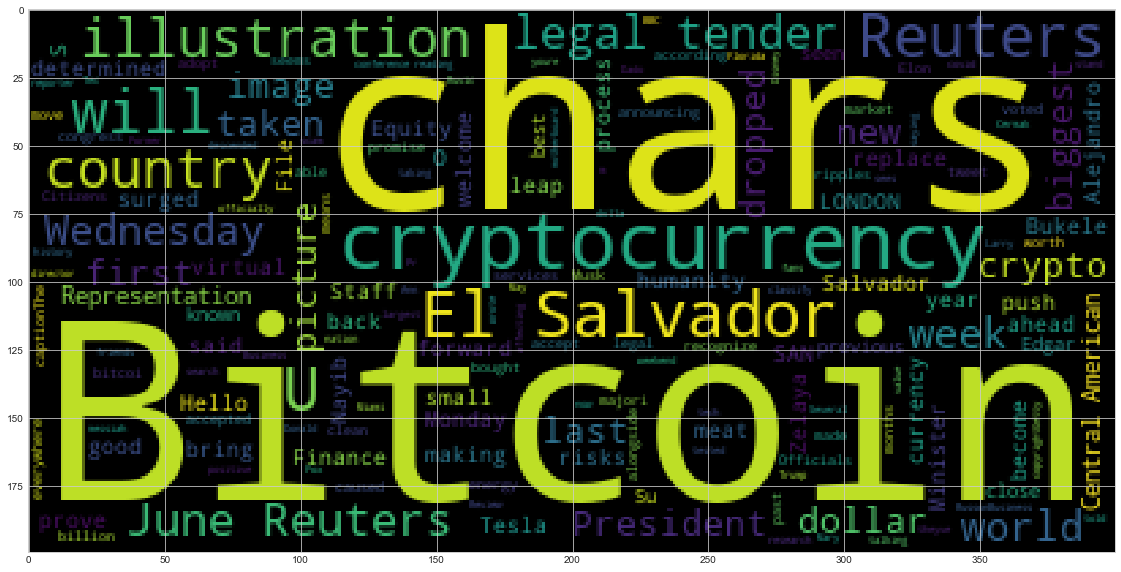

In [201]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
btc_big_string = ' '.join(btc_df['content'])

btc_wc = WordCloud().generate(btc_big_string)
plt.imshow(btc_wc)

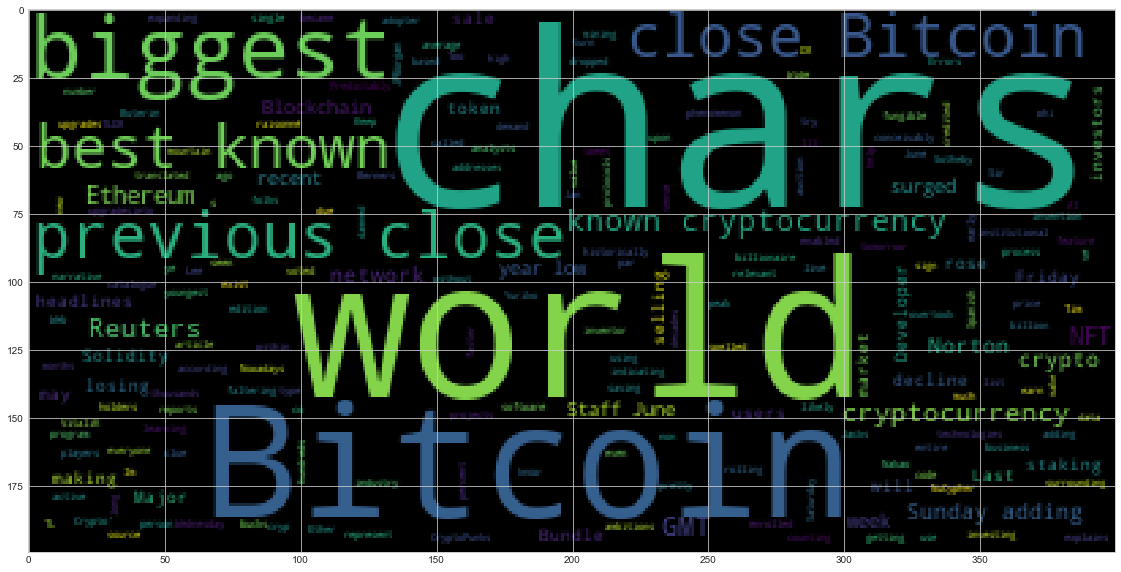

In [202]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_big_string = ' '.join(eth_df['content'])


eth_wc = WordCloud().generate(eth_big_string)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [219]:
import spacy
from spacy import displacy

In [220]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0-py3-none-any.whl (13.7 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [226]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [227]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_big_string

'El Salvador\'s President Nayib Bukele has made good on his promise to adopt Bitcoin as legal tender. Officials in the Central American country\'s congress voted to accept the cryptocurrency by a majori… [+1414 chars] El Salvador has become the first country in the world to recognize the cryptocurrency bitcoin as legal currency, according to President Nayib Bukele in a tweet on Wednesday. Citizens will be able to … [+3840 chars] It\'s all about clean energy, it seems.\xa0\r\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoi… [+2508 chars] image captionThe move means bitcoin will be accepted everywhere for goods and services, alongside the US dollar\r\nEl Salvador has become the first country in the world to officially classify Bitcoin a… [+2233 chars] Several crypto fans that descended on Miami, Florida, last weekend for the largest bitcoin conference in history are now saying t

In [238]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bitcoin = nlp(btc_big_string)
# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

NameError: name 'btc_doc' is not defined

In [230]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bitcoin, style = 'ent')

In [231]:
# List all Entities
# YOUR CODE HERE!
print(bitcoin.ents)

(El Salvador's, Nayib Bukele, Central American, El Salvador, first, Nayib Bukele, Wednesday, Citizens, Elon Musk, Tesla, the past few months, first, Tesla, $1.5 billion, US, El Salvador, first, Bitcoin, Miami, Florida, last weekend, covid-19, Larry Cermak, Last week, Disney, This week, Tec, Mary-Ann RussonBusiness, BBC News, US, Donald Trump, Fox Business, Bitcoin, US, June 16, Reuters, El Salvador, U.S., Finance, Alejandro Zelaya, Wednesday, Central American, LONDON, June 23, Reuters, El Salvador, LONDON, June 23, Reuters, El Salvador, Pr, Bitcoin, May 20, 2021, Reuters, Reuters, El Salvador, U.S., Finance, Alejandro Zelaya, Wednesday, the Central American, JBS, up to one quarter, US, Late last week, Monday, morning, earlier this year, Dogecoin, 8.54 %, 36,265, Wednesday, 2,853.31, Bitcoin, 30.8%, year, 27,734, Jan., Reuters, Bitcoin, June 7, 2021, Edgar Su/Illustration, Reuters, 5.71%, Bitcoin, 5.71%, 35,210, 0600, GMT, Saturday, 2,131.11, Bitcoin, 45.7%, 2021, 6, Bitcoin, June 14, 2

---

### Ethereum NER

In [232]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_big_string

"TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\r\nIs everyone you know investing in cryptocurrency? … [+949 chars] It wasn't long ago that your average person had no clue what an NFT was. Nowadays, they're making headlines for selling for hundreds of thousands of bucks. Predictably, folks are learning about NFTs … [+3056 chars] This article was translated from our Spanish edition using AI technologies. Errors may exist due to this process.\r\nLast May, VitaliK Buterin became the youngest billionaire in the world at just 27 ye… [+2422 chars] Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther overtook bitcoin in the number of active addresses on its network on Friday, a sign that demand is faltering for the world's biggest cryptocurrency as its co… [+2727 chars] This new mining feature is called 'Norton Crypto' and will be rolling out tomorrow to Norton 360 users enrolled in Norton's early ad

In [234]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ethereum = nlp(eth_big_string)
# Add a title to the document
# YOUR CODE HERE!
ethereum.user_data['title'] = 'Ethereum NER'

In [235]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ethereum, style = 'ent')

In [236]:
# List all Entities
# YOUR CODE HERE!
print(ethereum.ents)

(21.25, June 17, 97%, NFT, hundreds of thousands, Spanish, AI, Last May, Buterin, 27, Yuriko Nakao, Friday, tomorrow, Norton, Norton, Norton Crypto, decades, Ill, Jacks, $40 billion, 2025, JPMorgan, Tim Berners-Lee, NFT, Sotheby's, NFT, Two, Keep Network, Last week, NFT, as much as, 90 percent, recent weeks, recent months, 8.54 %, 36,265, Wednesday, 2,853.31, Bitcoin, 30.8%, year, 27,734, Jan., Bitcoin, 5.71%, 35,210, 0600, GMT, Saturday, 2,131.11, Bitcoin, 45.7%, 2021, 6, Getty Images
Investors, the third week, February 2018, Bitcoin, 9.83 %, 22:05, GMT, Sunday, 3,492.71, Bitcoin, 40.7%, year, 27, Reuters, June 25, Reuters, 8.51%, 31,699.83, 22:04, GMT, Friday, 2,937.27, Bitcoin, Reuters, June 13, Reuters, 5.11 %, 37,360.63, GMT, Sunday, 1,817.87, Bitcoin, Reuters, June 13, Reuters, 9.83 %, 22:05, GMT, Sunday, 3,492.71, Bitcoin, 5.11 %, 37,360.63, GMT, Sunday, 1,817.87, Bitcoin, 34.7%, year, 27,7)


---